In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

/Users/andrewshaw/miniconda3/envs/midi/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
from music21 import *

In [5]:
ad = Path('../medium_post_assets')

In [62]:
# Chords
c = music21.stream.Part()
i = music21.instrument.Piano()
i.instrumentName = 'Chords'

c.append(i)
c.append(music21.chord.Chord('A2 E3', type='half')) # vi power
c.append(music21.chord.Chord('C3 G3', type='half')) # I power

# Melody
m = music21.stream.Part()

notes = ['C4', 'D4', ('E4', 'half')]
i = music21.instrument.Piano()
i.instrumentName = 'Melody'
m.insert(i)

for n in notes:
    if isinstance(n, tuple):
        m.append(music21.note.Note(n[0], type=n[1]))
    else:
        m.append(music21.note.Note(n))

In [63]:
s = music21.stream.Score([m, c])

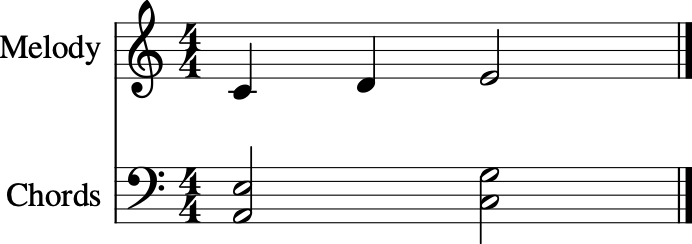

In [64]:
s.show()

In [65]:
s.write('midi', 'data/example.mid')

'data/example.mid'

In [75]:
c.write('midi', ad/'example_chords.mid')

PosixPath('../medium_post_assets/example_chords.mid')

In [77]:
m.write('midi', ad/'example_melody.mid')

PosixPath('../medium_post_assets/example_melody.mid')

In [66]:
item = MusicItem.from_file('data/example.mid', MusicVocab.create())

In [67]:
item.to_text()

'xxbos xxpad n60 d4 n52 d8 n45 d8 xxsep d4 n62 d4 xxsep d4 n64 d8 n55 d8 n48 d8'

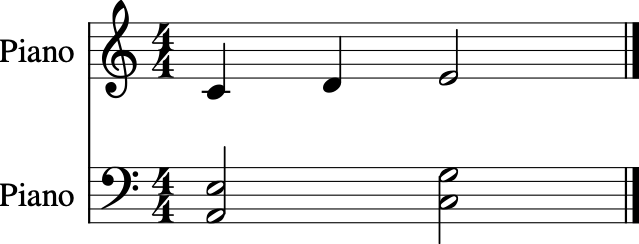

In [68]:
item.stream.show()

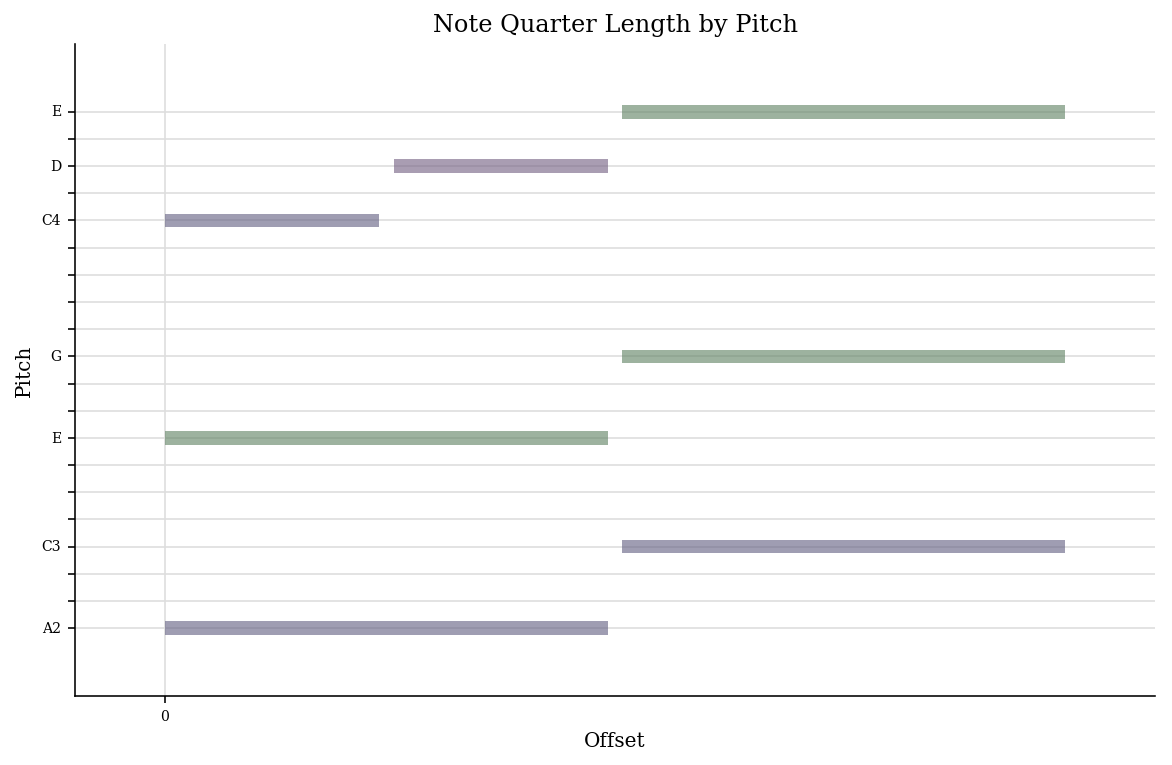

In [69]:
item.stream.plot()

In [70]:
from musicautobot.utils.midifile import *
file2mf(Path('data/example.mid'))

<MidiFile 2 tracks
  <MidiTrack 0 -- 22 events
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent SEQUENCE_TRACK_NAME, t=None, track=0, channel=None, data=b'Melody'>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent PROGRAM_CHANGE, t=None, track=0, channel=1, data=0>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent PITCH_BEND, t=None, track=0, channel=1, parameter1=0, parameter2=64>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent PROGRAM_CHANGE, t=None, track=0, channel=1, data=0>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent NOTE_ON, t=None, track=0, channel=1, pitch=60, velocity=90>
    <MidiEvent DeltaTime, t=1024, track=0, channel=None>
    <MidiEvent NOTE_OFF, t=None, track=0, channel=1, pitch=60, velocity=0>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent NOTE_ON, t=None, track=0, channel=1, pitch=62, velocity=90>
    <MidiEvent DeltaTime, t=1024, track=0, cha

In [71]:
item.data

array([  0,   1,  69, 141,  61, 145,  54, 145,   8, 141,  71, 141,   8, 141,  73, 145,  64, 145,  57, 145])

In [72]:
item.position//4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])